In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
train_df = pd.read_csv('data/train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Seems we have some missing values in our data so let's get 'em

In [5]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Handling Age

<AxesSubplot:xlabel='Age', ylabel='Density'>

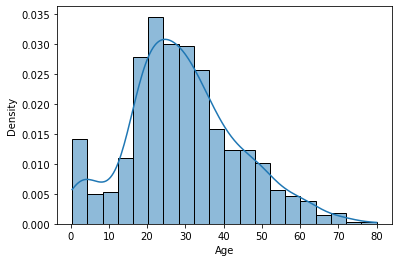

In [6]:
sns.histplot(data=train_df, x=train_df['Age'], stat='density', kde=True)

Since the isn't distributed normally, picking median rather mean seems to be the right choice

In [7]:
age_mean = train_df['Age'].mean()
age_mean

29.69911764705882

In [8]:
age_median = train_df['Age'].median()
age_median

28.0

Handling Cabin

In [9]:
train_df['Cabin'].shape[0]

891

In [10]:
train_df['Cabin'].isnull().sum()

687

In [11]:
train_df['Cabin'].isnull().sum()/train_df['Cabin'].shape[0]*100

77.10437710437711

77 percent of the cabin data is missing which means there is no point in trying to fill or make it work so we'll just drop it

Handling Embarked 

In [12]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
train_df['Embarked'].value_counts()/train_df.shape[0]*100

S    72.278339
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64

There are just two missing values and 72 percent of the passengers embarked from the harbor 'S', so we may as well just fill those two with 'S' and move on

Now Let's fix those

In [14]:
data = train_df.copy()

In [15]:
## Age
median_age = data['Age'].median()
median_age

28.0

In [16]:
data['Age'].fillna(median_age, inplace=True)

In [17]:
## Embarked
data['Embarked'].fillna(data['Embarked'].value_counts().idxmax(), inplace=True)

In [18]:
## Cabin
data.drop('Cabin', axis=1, inplace=True)

In [19]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Now let's examine if our predictors have any relationships with each other and their relationship with Y

In [20]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


SibSp stands for children of Parents and Parch stands for parents of children which means that they are giving iformation about each other and that is something we really don't want in our models 

In [21]:
# If we filter these two columns together and get where their total value is higher than 0, 
# it means that they didn't travel alone
data['TravelAlone'] = np.where(data['SibSp'] + data['Parch'] > 0, 0, 1)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,TravelAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [22]:
data.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [23]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,TravelAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,1


In [24]:
data = pd.get_dummies(data, columns=['Embarked', 'Pclass', 'Sex'], drop_first=True)

In [25]:
data.head()

,PassengerId,Survived,Name,Age,Ticket,Fare,TravelAlone,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Sex_male
0,1,0,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,0,0,1,0,1,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,0,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,1,0,1,0,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,0,0,1,0,0,0
4,5,0,"Allen, Mr. William Henry",35.0,373450,8.0500,1,0,1,0,1,1


In [26]:
data.drop('PassengerId', axis=1, inplace=True)

In [27]:
data.drop(['Name', 'Ticket'], axis=1, inplace=True) 

In [28]:
data.head()

,Survived,Age,Fare,TravelAlone,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Sex_male
0,0,22.0,7.2500,0,0,1,0,1,1
1,1,38.0,71.2833,0,0,0,0,0,0
2,1,26.0,7.9250,1,0,1,0,1,0
3,1,35.0,53.1000,0,0,1,0,0,0
4,0,35.0,8.0500,1,0,1,0,1,1


Age

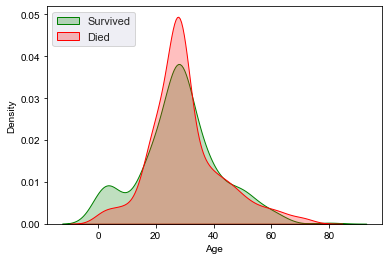

In [29]:
ax = sns.kdeplot(data['Age'][data.Survived == 1], color='green', shade=True, label='Survived')
sns.kdeplot(data['Age'][data.Survived == 0], color='red', shade=True, label='Died')
sns.set(rc={"figure.figsize":(15, 12)})
ax.legend(loc='upper left')

people who survived and died both are heavily in the 20-40 age, other than that we can say that older people sacrificed themselves for children since a great deal of young people survived

Fare

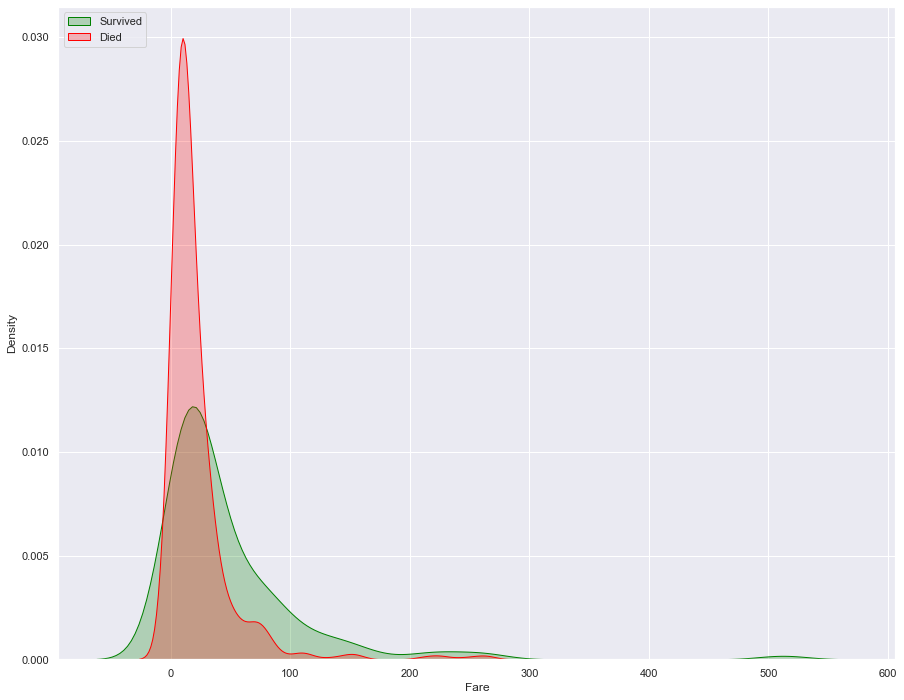

In [30]:
 ax = sns.kdeplot(data['Fare'][data.Survived == 1], color='green', shade=True, label='Survived')
sns.kdeplot(data['Fare'][data.Survived == 0], color='red', shade=True, label='Died')
sns.set(rc={"figure.figsize":(8, 2)})

ax.legend(loc='upper left')

As plain as it is, we can say that those who survived are those who paid much more than the others 

Pclass(Passenger Class)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

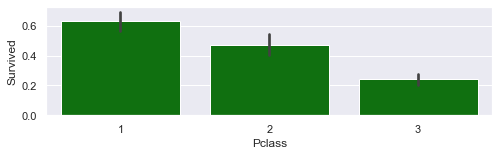

In [31]:
sns.barplot(x='Pclass', y='Survived', data=train_df, color='green')

This result also verifies that those who pays more(in this case first class passengers), survives

Sex

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

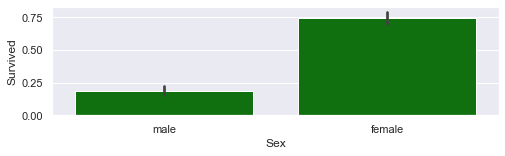

In [32]:
sns.barplot(x='Sex', y='Survived', data=train_df, color='green')

We can infer that the priority was given to females just like children, though this is just a inference

<AxesSubplot:xlabel='TravelAlone', ylabel='Survived'>

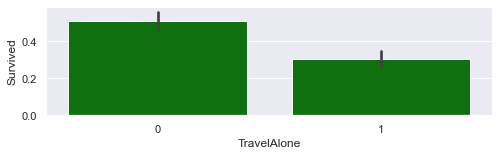

In [33]:
sns.barplot(x='TravelAlone', y='Survived', data=data, color='green')

Seems alone travelers died more 

Now we can proceed to modeling

In [34]:
data.head()

,Survived,Age,Fare,TravelAlone,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Sex_male
0,0,22.0,7.2500,0,0,1,0,1,1
1,1,38.0,71.2833,0,0,0,0,0,0
2,1,26.0,7.9250,1,0,1,0,1,0
3,1,35.0,53.1000,0,0,1,0,0,0
4,0,35.0,8.0500,1,0,1,0,1,1


In [35]:
data1 = data.copy()

In [36]:
y = data1['Survived']

In [37]:
data1.drop('Survived', axis=1, inplace=True)

In [38]:
data1.head()

,Age,Fare,TravelAlone,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Sex_male
0,22.0,7.2500,0,0,1,0,1,1
1,38.0,71.2833,0,0,0,0,0,0
2,26.0,7.9250,1,0,1,0,1,0
3,35.0,53.1000,0,0,1,0,0,0
4,35.0,8.0500,1,0,1,0,1,1


In [39]:
cols = data1.columns
cols

Index(['Age', 'Fare', 'TravelAlone', 'Embarked_Q', 'Embarked_S', 'Pclass_2',
       'Pclass_3', 'Sex_male'],
      dtype='object')

In [40]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
scaler = MinMaxScaler()

In [43]:
data1 = scaler.fit_transform(data1)

In [44]:
data1 = pd.DataFrame(data1, columns=[cols])

In [45]:
data1.head()

,Age,Fare,TravelAlone,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Sex_male
0,0.271174,0.014151,0.0,0.0,1.0,0.0,1.0,1.0
1,0.472229,0.139136,0.0,0.0,0.0,0.0,0.0,0.0
2,0.321438,0.015469,1.0,0.0,1.0,0.0,1.0,0.0
3,0.434531,0.103644,0.0,0.0,1.0,0.0,0.0,0.0
4,0.434531,0.015713,1.0,0.0,1.0,0.0,1.0,1.0


In [47]:
data1.shape

(891, 8)

In [49]:
y.shape

(891,)

In [55]:
y = y.values.reshape(-1,1)

In [56]:
y.shape

(891, 1)

In [46]:
from sklearn.model_selection import train_test_split

In [57]:
x_train, x_test, y_train, y_test = train_test_split(data1, y, test_size=0.2, random_state=2)

In [58]:
x_train.shape

(712, 8)

In [59]:
x_test.shape

(179, 8)

In [60]:
y_train.shape

(712, 1)

In [62]:
from sklearn.linear_model import LogisticRegression

In [65]:
logreg = LogisticRegression(solver='liblinear', random_state=0)

In [66]:
logreg.fit(x_train, y_train)

D:\downloads\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(random_state=0, solver='liblinear')

In [67]:
y_pred = logreg.predict(x_test)

In [68]:
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1], dtype=int64)

In [71]:
from sklearn.metrics import accuracy_score

In [72]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7597765363128491